In [27]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [28]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [29]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [30]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [31]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [32]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [33]:
# Save references to each table
measurements = Base.classes.measurement
stations = Base.classes.station

In [34]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [35]:
# Find the most recent date in the data set.
recent_date = session.query(measurements.date).order_by(measurements.date.desc()).first()
recent_date

('2017-08-23',)

In [36]:
recent_date_dt = dt.datetime.strptime(recent_date[0], '%Y-%m-%d').date()
recent_date_dt

datetime.date(2017, 8, 23)

In [37]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = recent_date_dt - dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

In [38]:
# Perform a query to retrieve the date and precipitation scores
precipitation = session.query(measurements.date, measurements.prcp).\
    filter(measurements.date >= '2016-08-23').all()

In [39]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(precipitation)
prcp_df1 = prcp_df.rename(columns = {'date':'Date', 'prcp':'Precipitation'})
prcp_df1.head()

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [40]:
# Sort the dataframe by date
prcp_df2 = prcp_df1.sort_values('Date')
prcp_df2.head()

,Date,Precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15


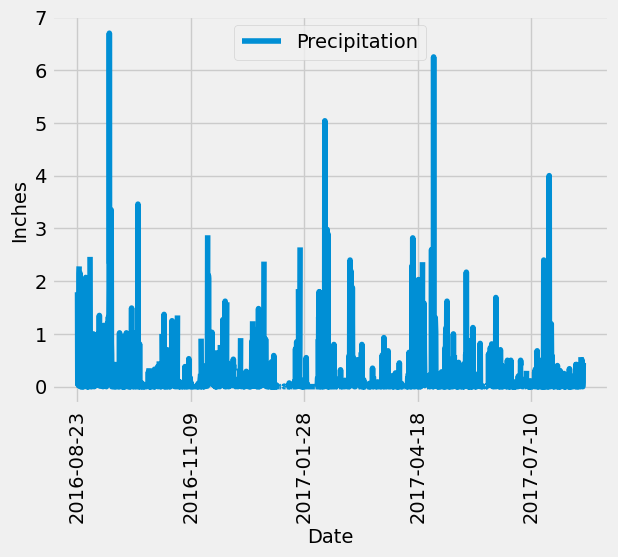

In [41]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df2.plot(x='Date', y='Precipitation')

plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation=90)

plt.show()

In [42]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df2.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [43]:
# Design a query to calculate the total number of stations in the dataset
session.query(measurements.station).distinct().count()

9

In [44]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
sel = [measurements.station, func.count(measurements.station)]

stations_count = session.query(*sel).\
    group_by(measurements.station).\
    order_by(desc(func.count(measurements.station))).all()

stations_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [45]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(measurements.tobs), func.max(measurements.tobs), func.avg(measurements.tobs)]

most_active = session.query(*sel).\
    filter(measurements.station == 'USC00519281').all()

most_active

[(54.0, 85.0, 71.66378066378067)]

In [46]:
most_active_temps = session.query(measurements.tobs).\
    filter(measurements.date >= '2016-08-23').\
    filter(measurements.station == 'USC00519281').all()

most_active_temps_df = pd.DataFrame(most_active_temps, columns=['Temperature'])
most_active_temps_df.head()

,Temperature
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


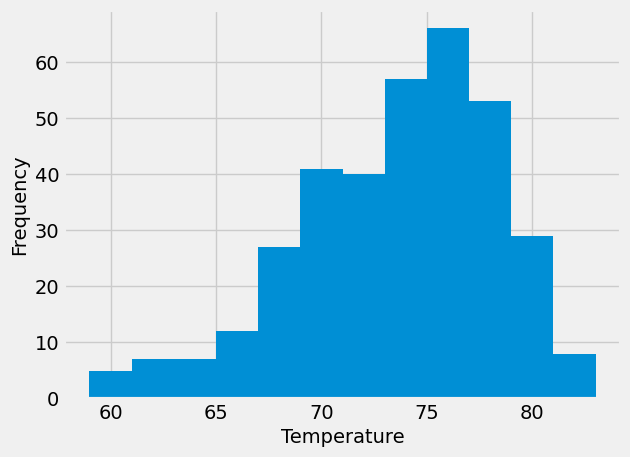

In [47]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_temps_df['Temperature'].hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.show()

# Close Session

In [48]:
# Close Session
session.close()